# Problem statement

In today’s digital age, laptops have become an essential tool for both personal and professional use. However, the wide variety of laptop brands, configurations, and price points can make selecting the right laptop a challenging task for consumers. The lack of transparency and complexity in pricing models leaves consumers struggling to understand what factors significantly influence laptop prices.

This project aims to address this issue by developing a machine learning-based solution to predict laptop prices based on various features like brand, processor type, RAM, storage, graphics card, and more. By building a predictive model and integrating it into an interactive Streamlit web application, users can gain insights into how different laptop specifications affect pricing. This solution seeks to empower consumers with better decision-making tools and provide retailers with data-driven insights into market trends and pricing strategies.




In [98]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import pickle

In [99]:
laptop_dataset=pd.read_csv("E:/MBA/Material/Semester III/ML/23291-projects/23291-Laptop_price_prediction/laptop_data.csv")

In [100]:
laptop_dataset.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [101]:
laptop_dataset.shape

(1303, 12)

In [102]:
# checking info
laptop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [103]:
# checking duplicates
laptop_dataset.duplicated().sum()

0

In [104]:
# checking missing values
laptop_dataset.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

## Data Preprocessing

In [105]:
# removing unnamed column
laptop_dataset.drop(columns="Unnamed: 0",inplace=True)

In [106]:
laptop_dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [107]:
# removing 'GB' suffix from Ram column and 'kg' suffix from weight column
laptop_dataset['Ram']=laptop_dataset['Ram'].str.replace('GB','')
laptop_dataset['Weight']=laptop_dataset['Weight'].str.replace('kg','')

laptop_dataset.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [108]:
# changing datatype of Ram and weight from object to int and float
laptop_dataset['Ram']=laptop_dataset['Ram'].astype('int32')
laptop_dataset['Weight']=laptop_dataset['Weight'].astype('float32')
print(laptop_dataset['Ram'].dtype)
print(laptop_dataset['Weight'].dtype)

int32
float32


## Exploratory Data Analysis

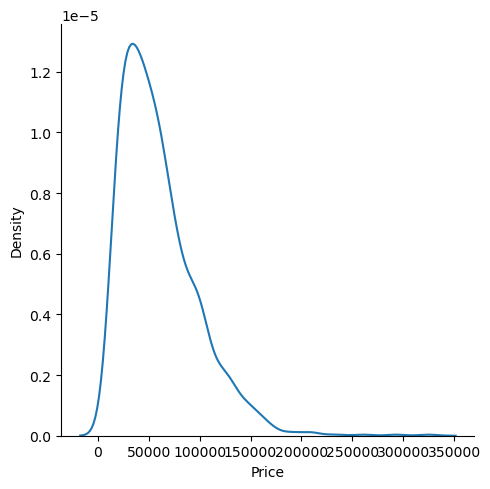

In [109]:
# checking distribution of price
sns.displot(data=laptop_dataset,kind='kde',x='Price')
plt.show()

# we see that the distribution is skewed. There are many laptops that have lower prices while only few laptops have high price
# will need to do transformation here

<AxesSubplot: >

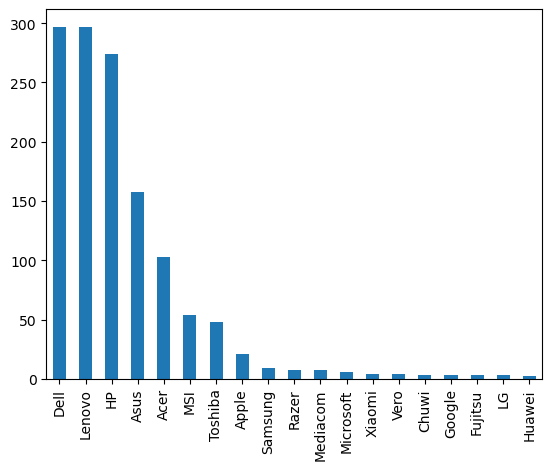

In [110]:
# checking which brands have largest number of laptops
laptop_dataset['Company'].value_counts().plot(kind='bar')

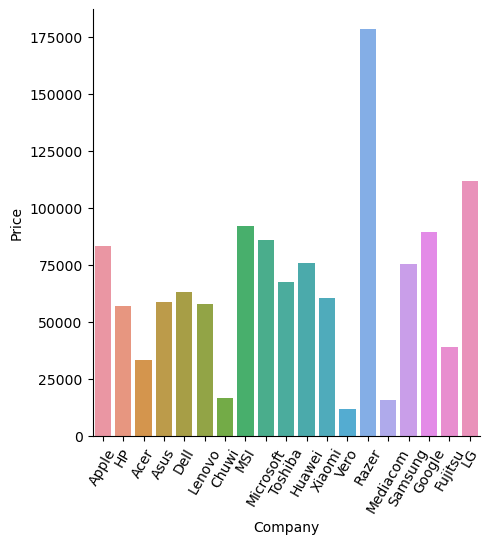

In [111]:
# checking which brands have higher avg price.
# This will show us whether Company column make any difference to our output label(Price)
sns.catplot(data=laptop_dataset,kind='bar',x='Company',y='Price',errorbar=None)
plt.xticks(rotation=60)
plt.show()

<AxesSubplot: >

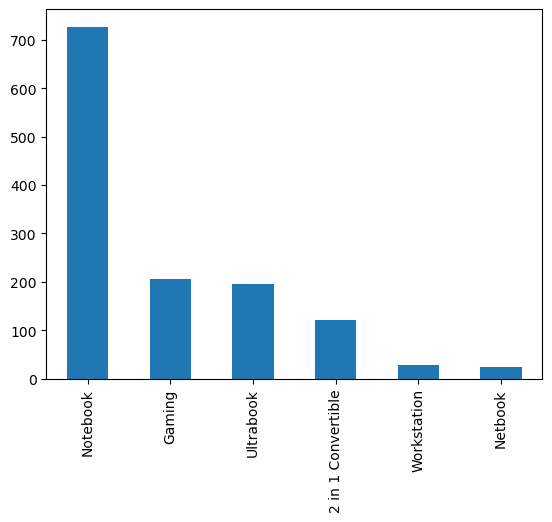

In [112]:
# checkting how many types of laptops and how many laptops are for each type
laptop_dataset['TypeName'].value_counts().plot(kind='bar')

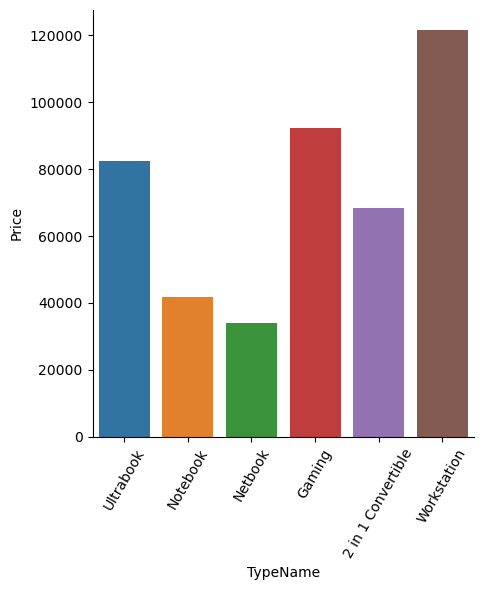

In [113]:
# checking which laptop types have higher avg price
# This will show us whether Company column make any difference to our output label(Price)

sns.catplot(data=laptop_dataset,kind='bar',x='TypeName',y='Price',errorbar=None)
plt.xticks(rotation=60)
plt.show()

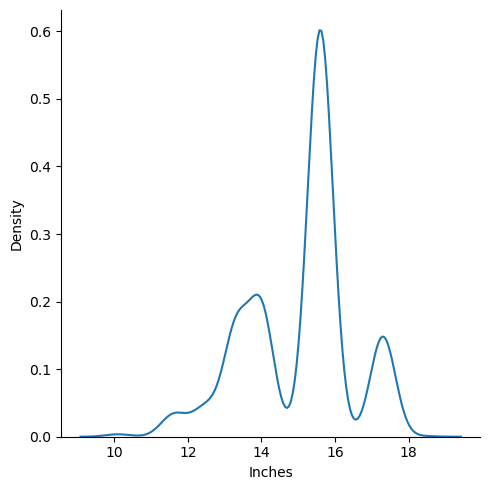

In [114]:
# checking distribution screen size
sns.displot(data=laptop_dataset,kind='kde',x='Inches')
plt.show()

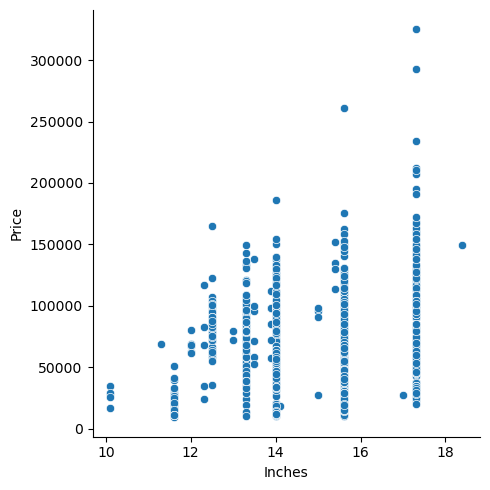

In [115]:
# checking relationship between screen size and price
# This will show us whether inches column makes any difference to our output label(Price)

sns.relplot(data=laptop_dataset,kind='scatter',x='Inches',y='Price')
plt.show()

# we can see that as the screen size is increasing the price is also increasing.
# However the relationship is not strong because prices for laptops with screen size in the range of 12.5 to 16 are somewhat similar

In [116]:
# checking unique screen resolution and their frequency
laptop_dataset['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [117]:
# screen resoultion column doesn't have data in uniform format
# quick glance at the column shows that resolution is present in all datapoints of the column , and the rest occur sometimes.
# Multiple information can be extracted from this column. Will do feature engineering later
laptop_dataset['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [118]:
# cpu column also has multiple information. will do feature engineering here too
laptop_dataset['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

<AxesSubplot: >

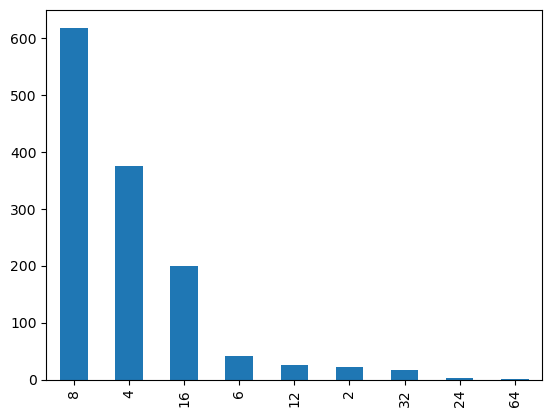

In [119]:
# checking the count for each Ram category
laptop_dataset['Ram'].value_counts().plot(kind='bar')

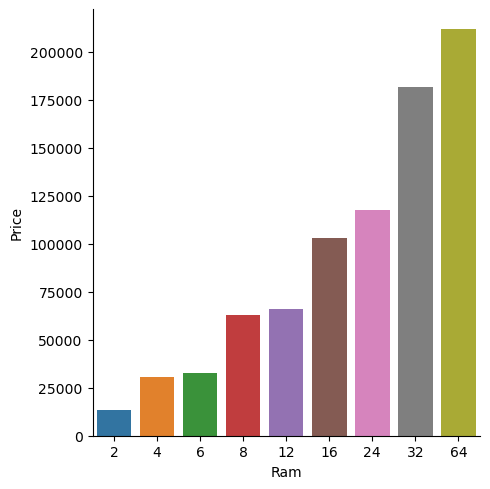

In [120]:
# checking how the price varies with each Ram category
# This will show us whether Ram column makes any difference to our output label(Price)

sns.catplot(data=laptop_dataset,kind='bar',x='Ram',y='Price',errorbar=None)
plt.show()

# we see that the price column is linearly related to Ram column. with increase in Ram , price increases too.


In [121]:
# Memory column also has multiple categories.
# multiple information can be extracted from here, so will do feature engineering here too
laptop_dataset['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [122]:
# Gpu column has many categories. 
# will need to do feature engineering here too
laptop_dataset['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [123]:
# checking how many categories are there in Opsys column
laptop_dataset['OpSys'].value_counts()

# there are not many categories, however there is scope is further reduction of no of categories
# will need to do feature engineering here too.

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

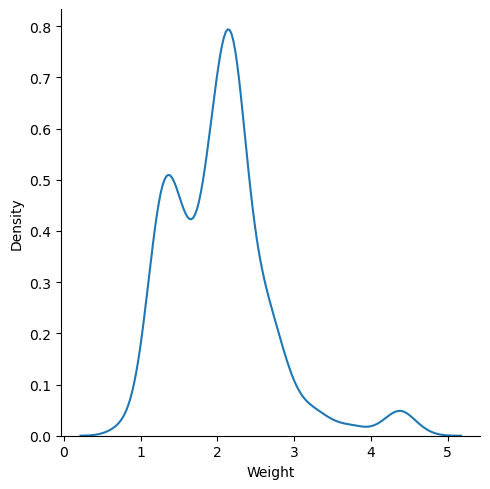

In [124]:
# checking the distribution of weight column
sns.displot(kind='kde',data=laptop_dataset,x='Weight')
plt.show()

# we see that distribution of weight is fairly normal

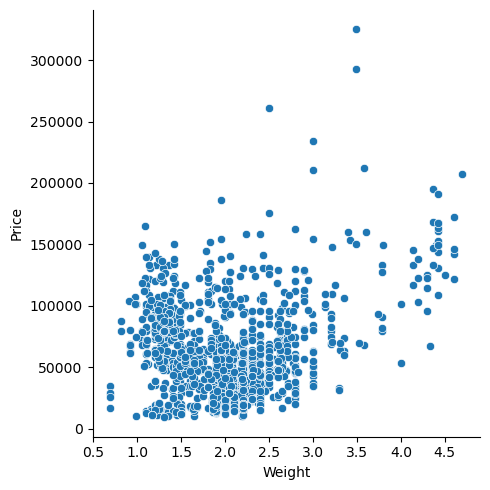

In [125]:
# checking the correlation of price column with weight column
sns.relplot(data=laptop_dataset,kind='scatter',x='Weight',y='Price')
plt.show()

# we see that there is a little bit of linear relationship between price column and weight column

In [126]:
# to check how significant is the correlation between weight and price, we find out the corr value of weight and price

print(laptop_dataset[['Price', 'Weight']].corr().loc['Price','Weight'])


0.21036980196834204


## Feature Engineering

In [127]:

# It shows whether the laptop is touchscreen or not, IPS panel is there or not
# Doing a feature engineering here and extracting a new column which tells whether a laptop is touch screen or not. Getting this in an encoded format (1 for true and 0 for false)

laptop_dataset['Touchscreen']=laptop_dataset['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
laptop_dataset.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1011,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.26,81997.9200,0
146,HP,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core M 6Y75 1.2GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,0.97,107305.9200,1
1006,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.95,64202.4000,0
571,HP,Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8,2TB HDD,Intel HD Graphics 405,Windows 10,1.94,20725.9200,0
224,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,130873.7952,0
1116,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16,256GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.60,146519.4672,0
179,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.29,79866.7200,1
249,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,512GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,108691.2000,0
1234,Apple,Ultrabook,11.6,1366x768,Intel Core i5 1.6GHz,4,256GB Flash Storage,Intel HD Graphics 6000,Mac OS X,1.08,51095.5200,0
106,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,1.85,22105.8720,0


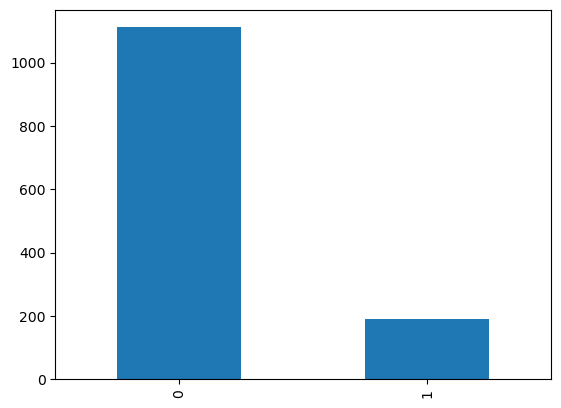

In [128]:
# checking how many laptops have touchscreen feature
laptop_dataset['Touchscreen'].value_counts().plot(kind='bar')
plt.show()

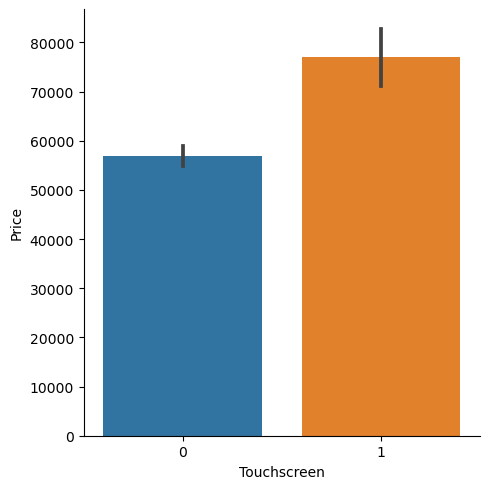

In [129]:
# checking whether touchscreen laptops have higher avg price or not.
# This will show us whether our new Touchscreen column make any difference to our output label(Price)
sns.catplot(data=laptop_dataset,kind='bar',x='Touchscreen',y='Price')
plt.show()

In [130]:
# Doing a feature engineering here and extracting a new column which tells whether a laptop has IPS or not. Getting this in an encoded format (1 for true and 0 for false)

laptop_dataset['Ips']=laptop_dataset['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
laptop_dataset.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
557,Lenovo,Notebook,17.3,1600x900,Intel Core i7 7500U 2.7GHz,6,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,2.80,50562.7200,0,0
1051,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,Windows 10,1.91,52161.1200,0,1
257,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,1TB HDD,Nvidia GeForce MX150,Windows 10,2.90,56423.5200,0,1
1073,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.49,58075.2000,0,0
857,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,136343.5200,1,0
728,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Linux,2.32,31409.6256,0,0
1091,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,No OS,1.86,18434.3472,0,0
630,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.10,101232.0000,0,0
548,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.86,21152.1600,0,0


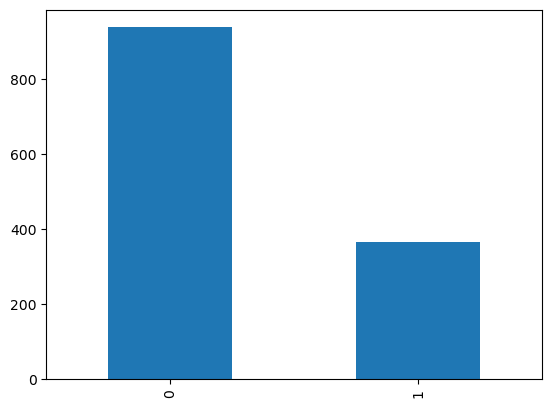

In [131]:
# checking how many laptops have Ips feature
laptop_dataset['Ips'].value_counts().plot(kind='bar')
plt.show()

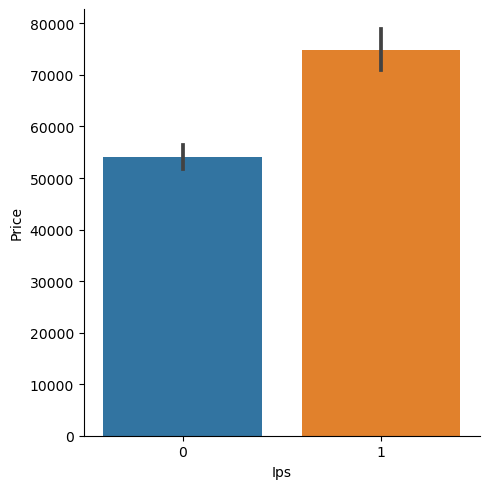

In [132]:
# checking whether laptops with Ips have higher avg price or not.
# This will show us whether our new Ips column makes any difference to our output label(Price)
sns.catplot(data=laptop_dataset,kind='bar',x='Ips',y='Price')
plt.show()

In [133]:
# Doing a feature engineering here and extracting two new columns which gives us resolution of screen along x and y axis
# storing these two columns in a temporary variable
temp = laptop_dataset['ScreenResolution'].str.split('x',n=1,expand=True)
temp



,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [134]:
# now adding these x resolution and y resolution column to our dataset
laptop_dataset['x_resolution']=temp[0]
laptop_dataset['y_resolution']=temp[1]
laptop_dataset.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_resolution,y_resolution
584,Dell,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.26,15717.60,0,0,1366,768
208,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,77202.72,0,0,Full HD 1920,1080
1191,Samsung,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53 2.0GHz,4,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,IPS Panel Touchscreen 2400,1600
68,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.90,29250.72,0,0,Full HD 1920,1080
1288,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0,0,1366,768


In [135]:
# now we see that y resolution looks fine but x resolution has some unwanted data.
# removing those unwanted data from x resolution column
laptop_dataset['x_resolution'] =laptop_dataset['x_resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
laptop_dataset.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,x_resolution,y_resolution
944,Lenovo,2 in 1 Convertible,11.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core M m7-6Y75 1.2GHz,8,256GB SSD,Intel HD Graphics 515,Windows 10,1.10,69210.72,1,1,1920,1080
241,Asus,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce 150MX,Windows 10,2.10,61005.60,0,0,1920,1080
41,Dell,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.65,79866.72,0,1,1920,1080
103,HP,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,1.38,59620.32,0,1,1920,1080
453,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.65,71661.60,0,0,1920,1080


In [136]:
# checking datatypes of x resolution and y resolution column because most likely it would be as object
print(laptop_dataset.x_resolution.dtype)
print(laptop_dataset.y_resolution.dtype)

object
object


In [137]:
# now changing the dtype of x and y resolution columns to int
laptop_dataset['x_resolution']=laptop_dataset['x_resolution'].astype('int')
laptop_dataset['y_resolution']=laptop_dataset['y_resolution'].astype('int')

print(laptop_dataset.x_resolution.dtype)
print(laptop_dataset.y_resolution.dtype)

int32
int32


In [138]:
laptop_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  x_resolution      1303 non-null   int32  
 14  y_resolution      1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


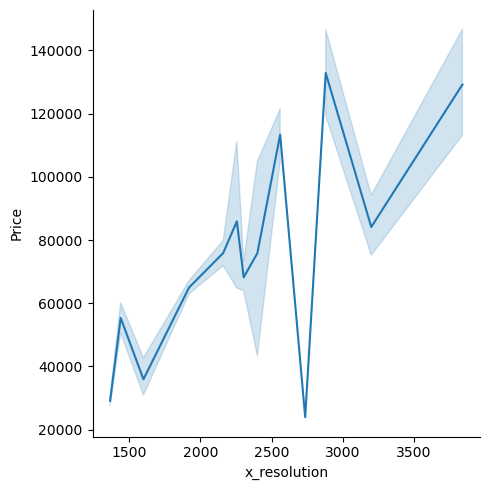

0.556529328716981


In [139]:
# checking whether our new x_resolution column makes any difference to our output label(Price)
sns.relplot(kind='line',data=laptop_dataset,x='x_resolution',y='Price')
plt.show()

# we see that there is some noise , however overall trend is an upward trend
# so checking correlation to be sure
print(laptop_dataset[['Price', 'x_resolution']].corr().loc['Price','x_resolution']
)

# upon looking at the corelation value we see that correlation between price and x_resolution is quite strong


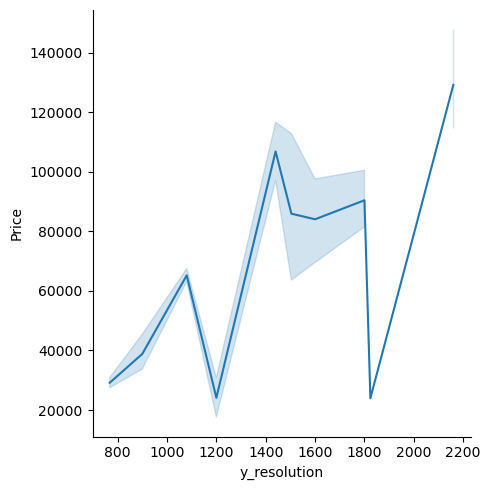

0.5528092198175063


In [140]:
# checking whether our new y_resolution column makes any difference to our output label(Price)
sns.relplot(kind='line',data=laptop_dataset,x='y_resolution',y='Price')
plt.show()
# we see that there is some noise , however overall trend is an upward trend

# so checking correlation to be sure
print(laptop_dataset[['Price', 'y_resolution']].corr().loc['Price','y_resolution']
)

# upon looking at the corelation value we see that correlation between price and x_resolution is quite strong


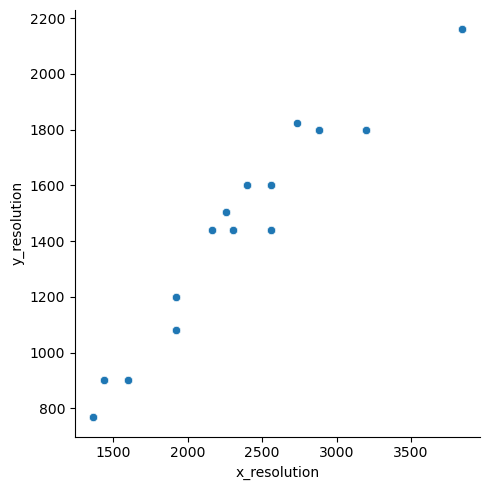

In [141]:
# we saw in the above cells that our output label depends on x and y resolution.
# However common sense tells us that x_resolution and y_resolution are realted to one another too.
# checking the same

sns.relplot(data=laptop_dataset,kind='scatter',x='x_resolution',y='y_resolution')
plt.show()

# Graph proves that there a definitely a strong co relation between columns x_resolution and y_resolution columns
# Now this is a problem

In [142]:
# The problem mentioned above is a multicolinearity problem
# Multicolinearity leads to redundant data being fed to model.
# so creating a new column out of x_res and y_res column
# This new column will give us pixels per inches (PPI)
# Its a common knowledge that laptops with more ppi are more costlier
# ppi can be calculated using the following formula

laptop_dataset['ppi']=(((laptop_dataset['x_resolution']**2) + (laptop_dataset['y_resolution']**2))**0.5/laptop_dataset['Inches']).astype('float')

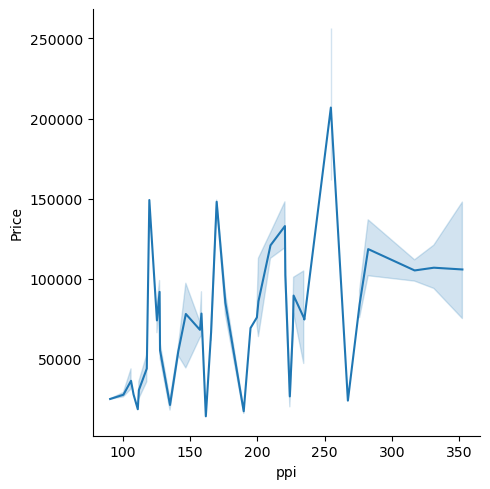

0.4734873076608601


In [143]:
# checking whether our new ppi column makes any difference to our output label(Price)
sns.relplot(kind='line',data=laptop_dataset,x='ppi',y='Price')
plt.show()

# we see that there is some noise
# so checking correlation 
print(laptop_dataset[['Price', 'ppi']].corr().loc['Price','ppi'])

# we see that the corelation is quite strong

In [144]:
# now dropping screen resolution column because every useful info from it has been extracted
laptop_dataset.drop(columns='ScreenResolution',inplace=True)

In [145]:
# dropping other non-useful columns too
laptop_dataset.drop(columns=['Inches','x_resolution','y_resolution'],inplace=True)


In [146]:
laptop_dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [147]:
# CPU column also has many information
# we see that there are many categories in this column

laptop_dataset['Cpu'].value_counts()



Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [148]:
# We saw above that there are many categories in the cpu column
# creating 5 new categories from cpu.
# categories are Intel i3,Intel i5, Intel i7, Other intel and AMD

# first splitting the data in the cpu column and storing it in a new column
laptop_dataset['Cpu name']=laptop_dataset['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
laptop_dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [149]:
# now using our new column Cpu name, we'll find out the category under which a particular laptop falls in.
# for this we have to make a function

def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [150]:
# now using the function we'll find out the categories of the laptops and store it in a column called cpu brand
laptop_dataset['Cpu brand'] = laptop_dataset['Cpu name'].apply(fetch_processor)


In [151]:
laptop_dataset.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot: >

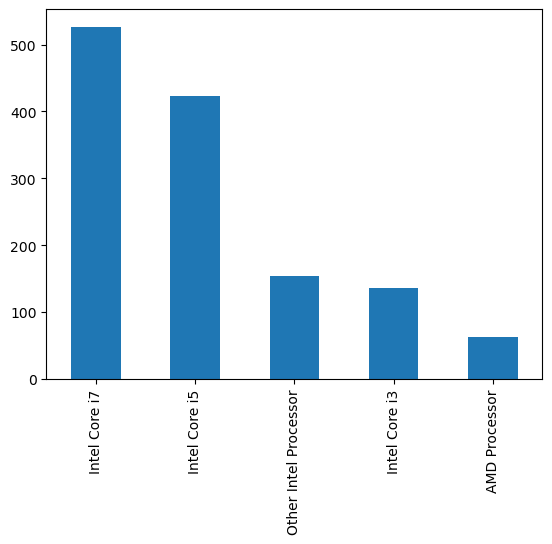

In [152]:
# plotting the count of different cpu brand categories
laptop_dataset['Cpu brand'].value_counts().plot(kind='bar')

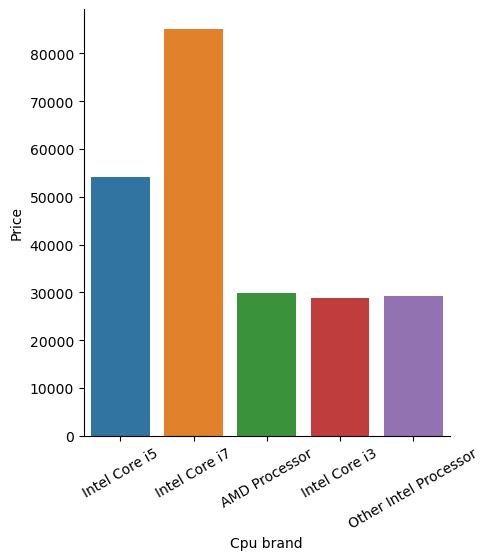

In [153]:
# now let us see how the price varies with different cpu brand
sns.catplot(data=laptop_dataset,kind='bar',x='Cpu brand',y='Price',errorbar=None)
plt.xticks(rotation=30)
plt.show()

In [154]:
# now dropping the columns cpu and cpu name
laptop_dataset.drop(columns=['Cpu','Cpu name'],inplace=True)
laptop_dataset.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [155]:
# We saw above that there are many information in the Memory column
# We'll make 4 new columns from the memory column
# New columns will tell whether the laptop has SSD, HDD, Flash or hybrid

laptop_dataset['Memory'] = laptop_dataset['Memory'].astype(str).replace('\.0', '', regex=True)
laptop_dataset["Memory"] = laptop_dataset["Memory"].str.replace('GB', '')
laptop_dataset["Memory"] = laptop_dataset["Memory"].str.replace('TB', '000')
new = laptop_dataset["Memory"].str.split("+", n=1, expand=True)

laptop_dataset["first"] = new[0]
laptop_dataset["first"] = laptop_dataset["first"].str.strip()

laptop_dataset["second"] = new[1]

laptop_dataset["Layer1HDD"] = laptop_dataset["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_dataset["Layer1SSD"] = laptop_dataset["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_dataset["Layer1Hybrid"] = laptop_dataset["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_dataset["Layer1Flash_Storage"] = laptop_dataset["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop_dataset['first'] = laptop_dataset['first'].str.replace(r'\D', '', regex=True)  

laptop_dataset["second"].fillna("0", inplace=True)

laptop_dataset["Layer2HDD"] = laptop_dataset["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop_dataset["Layer2SSD"] = laptop_dataset["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop_dataset["Layer2Hybrid"] = laptop_dataset["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop_dataset["Layer2Flash_Storage"] = laptop_dataset["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop_dataset['second'] = laptop_dataset['second'].str.replace(r'\D', '', regex=True)  

laptop_dataset["first"] = laptop_dataset["first"].astype(int)
laptop_dataset["second"] = laptop_dataset["second"].astype(int)

laptop_dataset["HDD"] = (laptop_dataset["first"] * laptop_dataset["Layer1HDD"] +
                         laptop_dataset["second"] * laptop_dataset["Layer2HDD"])
laptop_dataset["SSD"] = (laptop_dataset["first"] * laptop_dataset["Layer1SSD"] +
                         laptop_dataset["second"] * laptop_dataset["Layer2SSD"])
laptop_dataset["Hybrid"] = (laptop_dataset["first"] * laptop_dataset["Layer1Hybrid"] +
                            laptop_dataset["second"] * laptop_dataset["Layer2Hybrid"])
laptop_dataset["Flash_Storage"] = (laptop_dataset["first"] * laptop_dataset["Layer1Flash_Storage"] +
                                    laptop_dataset["second"] * laptop_dataset["Layer2Flash_Storage"])

laptop_dataset.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                             'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                             'Layer2Flash_Storage'], inplace=True)



In [156]:
laptop_dataset.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
91,Acer,Notebook,8,1000 HDD,Nvidia GeForce MX150,Windows 10,2.20,36709.920,0,0,141.211998,Intel Core i7,1000,0,0,0
368,Dell,Notebook,8,256 SSD,AMD Radeon R7 M445,Windows 10,2.33,47898.720,0,0,141.211998,Intel Core i7,0,256,0,0
56,HP,Notebook,4,128 SSD,Intel HD Graphics 520,Windows 10,1.91,23389.920,0,0,141.211998,Intel Core i3,0,128,0,0
106,Lenovo,Notebook,4,1000 HDD,Intel HD Graphics 520,Windows 10,1.85,22105.872,0,0,141.211998,Intel Core i3,1000,0,0,0
155,HP,Notebook,6,256 SSD,AMD Radeon 520,Windows 10,1.91,32980.320,0,0,141.211998,Intel Core i5,0,256,0,0


In [157]:
# dropping Memory column now
laptop_dataset.drop(columns='Memory',inplace=True)

In [158]:
laptop_dataset.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [159]:
# checking correlation of new columns with price
laptop_dataset.corr(numeric_only=True)['Price']

# we see that SSD has high positive correlation with price. The correlation of Hybrid and flash are negligible 
# So will keep only SSD and HDD column 

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [160]:
laptop_dataset.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
laptop_dataset.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [161]:
# Gpu column has many categories
# This column doesn't have much information.
# we can extract Gpu brand name from here

laptop_dataset['Gpu brand']=laptop_dataset['Gpu'].apply(lambda x:x.split()[0])
laptop_dataset.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
350,Dell,Notebook,16,Nvidia GeForce GTX 1050,Windows 10,2.06,108020.9376,1,0,282.423996,Intel Core i7,0,512,Nvidia
224,Dell,Gaming,16,Nvidia GeForce GTX 1060,Windows 10,4.42,130873.7952,0,1,127.335675,Intel Core i7,1000,256,Nvidia
297,Dell,Workstation,16,Nvidia Quadro M1200,Windows 10,3.42,153705.3408,0,0,127.335675,Intel Core i7,0,256,Nvidia
623,Fujitsu,Notebook,8,Intel HD Graphics 620,Windows 10,2.20,42570.7200,0,0,100.454670,Intel Core i5,0,256,Intel
524,Dell,Notebook,8,AMD Radeon 530,Linux,2.80,47365.9200,0,1,127.335675,Intel Core i5,1000,128,AMD


In [162]:
# now lets how many categories got formed in Gpu brand column
laptop_dataset['Gpu brand'].value_counts()

# The number of categories got reduced significantly


Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [163]:
# we see above that there is only one laptop with Gpu brand as Arm
# removing that column

laptop_dataset = laptop_dataset[laptop_dataset['Gpu brand'] != 'ARM']
laptop_dataset['Gpu brand'].value_counts()




Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

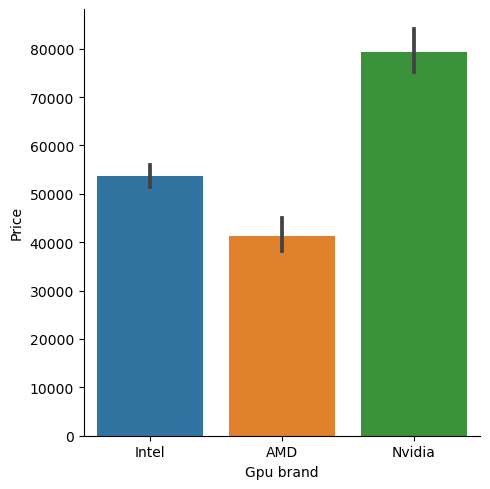

In [164]:
# now let us see how the price depends on Gpu brand
sns.catplot(data=laptop_dataset,kind='bar',x='Gpu brand',y='Price')
plt.show()

In [165]:
# dropping GPU column now
laptop_dataset.drop(columns='Gpu',inplace=True)
laptop_dataset.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [166]:
# there are not many categories in Opsys column, however there is scope is further reduction of no of categories
# writing one function for doing this

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [167]:
# now adding one new column which will contain the new categories of OS
laptop_dataset['os'] = laptop_dataset['OpSys'].apply(cat_os)
laptop_dataset.head()


,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [168]:
# now dropping old Opsys column
laptop_dataset.drop(columns='OpSys',inplace=True)
laptop_dataset.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


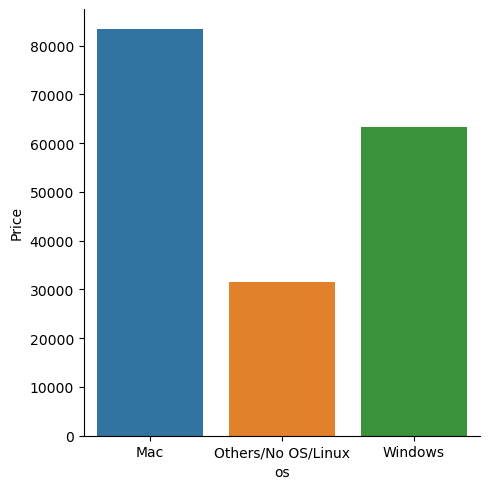

In [169]:
# checking the price variation with our new os column
sns.catplot(data=laptop_dataset,kind='bar',x='os',y='Price',errorbar=None)
plt.show()

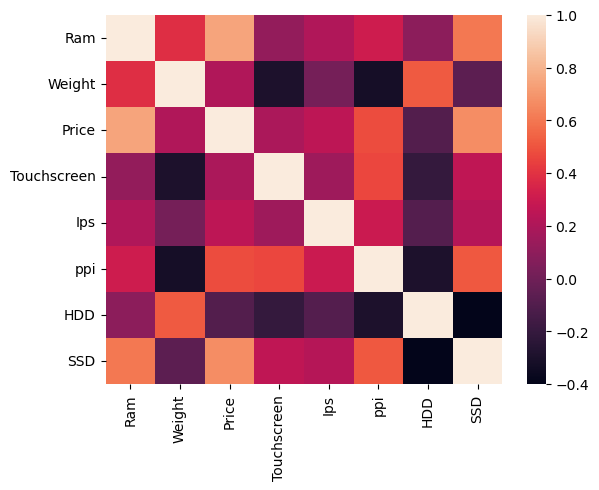

In [170]:
# we are done with EDA and Feature engineering for all the columns
# let us once see the whole correlation matrix

sns.heatmap(laptop_dataset.corr(numeric_only=True))
plt.show()

# we see that there is no strong correlation between input columns

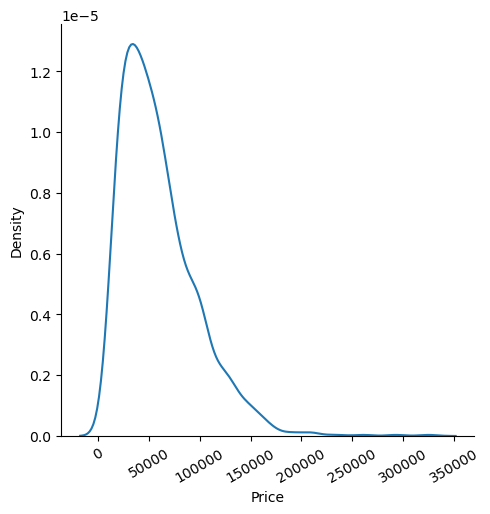

In [171]:
# we had seen in the beginning that our output column is skewed.
sns.displot(data=laptop_dataset,kind='kde',x='Price')
plt.xticks(rotation=30)
plt.show()

In [172]:
# doing log transformation on price column to make it normal
# also separating x and y variables 
X=laptop_dataset.drop(columns='Price')
y=np.log(laptop_dataset['Price'])

In [173]:
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [174]:
y.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

## building model

#### Linear regression

In [175]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

In [176]:
# ML model won't understand categorical columns as it is. we need to encode our categorical columns
# encoding categorical columns by using one hot encoder inside column transformer
# adding column transformer to pipeline along with model and training the model


step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2=LinearRegression()  # using linear regression model

pipe=Pipeline([('step1',step1),('step2',step2)])

pipe.fit(X_train,y_train) # training the model

y_pred=pipe.predict(X_test)  # predicting 


# printing metrics
print('R2 Score',r2_score(y_test,y_pred))        
print('MAE',mean_absolute_error(y_test,y_pred))

R2 Score 0.8073277448418488
MAE 0.2101782797642889


In [177]:
# finding exponential of MAE because we had used log of price in the model
np.exp(0.21)

# we see that the MAE is only Rs 1.23 which not bad

1.2336780599567432

#### Ridge regression

In [178]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.812733103131181
MAE 0.20926802242582954


#### Lasso regression

In [179]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071853945317102
MAE 0.21114361613472593


#### k nearest neighbours

In [180]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8027675291937718
MAE 0.193456293739003


#### Decision tree

In [181]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8378694094021681
MAE 0.18307736947076192


#### Support Vector Machines

In [182]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8083180902283282
MAE 0.2023905942725167


## Ensemble Models

#### Adaboost

In [183]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7943657593467145
MAE 0.2271416928100309


#### Gradient Boost

In [184]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8817271292766852
MAE 0.15958944377574202


#### xgboost

In [185]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8771404806375557
MAE 0.16262936288951352


#### Voting regressor

In [186]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=None,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb)],weights=[5,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8899504800400653
MAE 0.15679186150162916


#### Random Forest

In [187]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15
                              )

pipe_rf = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_rf.fit(X_train,y_train)

y_pred = pipe_rf.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8873402378382488
MAE 0.15860130110457718


## Hyperparameter tuning

In [188]:
# Hyperparameter tuning of Random forest

param_grid = {
    'step2__n_estimators': [100, 200, 300],        # Number of trees
    'step2__max_depth': [10, 15, 20],              # Maximum depth
    'step2__max_features': [0.75, 1.0]             # Number of features to consider at each split
}

grid_search = GridSearchCV(estimator=pipe_rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(X_train, y_train)

y_pred = grid_search.best_estimator_.predict(X_test)

print('Best Parameters:', grid_search.best_params_)
print('Best R2 score (training):', grid_search.best_score_)
print('Test R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# hyperparameter tuning not making any difference to results

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'step2__max_depth': 15, 'step2__max_features': 0.75, 'step2__n_estimators': 100}
Best R2 score (training): 0.8630008271204425
Test R2 score: 0.8873402378382488
MAE: 0.15860130110457718


In [190]:
# Hyperparameter tuning of xgboost

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = XGBRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

param_grid = {
    'step2__n_estimators': [25, 45, 100],   # Number of boosting rounds
    'step2__max_depth': [3, 5, 7],          # Maximum tree depth
    'step2__learning_rate': [0.1, 0.3, 0.5] # Learning rate
}

grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(X_train, y_train)

y_pred = grid_search.best_estimator_.predict(X_test)

print('Best Parameters:', grid_search.best_params_)
print('Best R2 score (training):', grid_search.best_score_)
print('Test R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# hyperparameter tuning not making much difference to results


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'step2__learning_rate': 0.3, 'step2__max_depth': 3, 'step2__n_estimators': 100}
Best R2 score (training): 0.871188120125241
Test R2 score: 0.8883483961201477
MAE: 0.15445427068357942


In [191]:
# Hyperparameter tuning of gradient boost


step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = GradientBoostingRegressor()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

param_grid = {
    'step2__n_estimators': [100, 300, 500],  # Number of boosting stages to be run
    'step2__max_depth': [3, 5, 7],            # Maximum depth of the individual regression estimators
    'step2__learning_rate': [0.01, 0.1, 0.3], # Step size shrinkage used in update to prevent overfitting
    'step2__min_samples_split': [2, 5, 10]    # Minimum number of samples required to split an internal node
}

grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(X_train, y_train)

y_pred = grid_search.best_estimator_.predict(X_test)

print('Best Parameters:', grid_search.best_params_)
print('Best R2 score (training):', grid_search.best_score_)
print('Test R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

# # hyperparameter tuning not improving the results



Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'step2__learning_rate': 0.1, 'step2__max_depth': 3, 'step2__min_samples_split': 5, 'step2__n_estimators': 500}
Best R2 score (training): 0.8772307448239592
Test R2 score: 0.8805014247629794
MAE: 0.16056550381736273


## Exporting the model

In [189]:
# # Exporting Random forest model
# pickle.dump(laptop_dataset, open('E:/MBA/Material/Semester III/ML/23291-projects/23291-Laptop_price_prediction/laptop_dataset.pkl', 'wb'))
# pickle.dump(pipe_rf, open('E:/MBA/Material/Semester III/ML/23291-projects/23291-Laptop_price_prediction/pipe_rf.pkl', 'wb'))
